# Image Classification using Convolutional Neural Networks in Pytorch

### CIFAR 100 Dataset

The [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

In [14]:
import torch
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [2]:
DATA_DIR = './data'
TRAIN_DIR = f'{DATA_DIR}/training'
EVAL_DIR = f'{DATA_DIR}/eval'

# Directory creation for data
os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(EVAL_DIR, exist_ok=True)

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = CIFAR100(root=TRAIN_DIR, download=True, train=True, transform=transform)
eval_dataset = CIFAR100(root=EVAL_DIR, download=True, train=False, transform=transform)

100%|███████████████████████| 169001437/169001437 [00:06<00:00, 24389697.18it/s]


Extracting ./data/training/cifar-100-python.tar.gz to ./data/training


100%|████████████████████████| 169001437/169001437 [00:19<00:00, 8647088.93it/s]


Extracting ./data/eval/cifar-100-python.tar.gz to ./data/eval


## Let's look at the data

In [4]:
for img, label in train_dataset:
    print(img.shape)
    print(f"{label=}")
    break

torch.Size([3, 32, 32])
label=19


The images are 3 channel RGB images

In [13]:
all_classes = train_dataset.classes
print(f"Total classes in this dataset {len(all_classes)}\n")
print("CLASSES in DATASET")
for i in range(0,len(all_classes), 10):
    print(all_classes[i:i+10], sep=', ')

Total classes in this dataset 100

CLASSES in DATASET
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle']
['bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle']
['chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur']
['dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard']
['lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain']
['mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree']
['plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket']
['rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider']
['squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor']
['train', 

In [26]:
def show_img(img, label):
    """
    Function displays the image and its label
    """
    print("Label: ", train_dataset.classes[label])
    plt.imshow(img.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  cattle


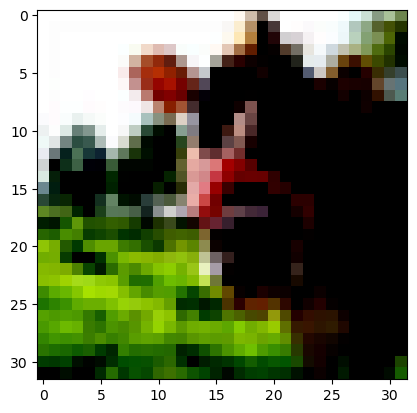

In [29]:
show_img(*train_dataset[0])show_img(*train_dataset[0])

The resolution of these images are really bad but our CNN should have no problem in classifying these images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  keyboard


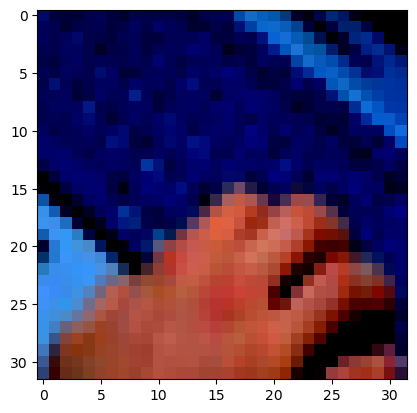

In [30]:
show_img(*train_dataset[10])

## Data Preperation